In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
std=pd.read_csv('StudentsPerformance.csv')
std.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
std.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
std.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [6]:
std.rename(columns={'race/ethnicity':'race', 'parental level of education':'p_ed','test preparation course':'t_p','math score':'m_score','reading score':'r_score','writing score':'w_score'}, inplace=True)

In [7]:
std.columns

Index(['gender', 'race', 'p_ed', 'lunch', 't_p', 'm_score', 'r_score',
       'w_score'],
      dtype='object')

In [8]:
std.head(5)


,gender,race,p_ed,lunch,t_p,m_score,r_score,w_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
std.race.unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [10]:
std.p_ed.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [11]:
std.dtypes

gender     object
race       object
p_ed       object
lunch      object
t_p        object
m_score     int64
r_score     int64
w_score     int64
dtype: object

In [12]:
std.describe()

,m_score,r_score,w_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


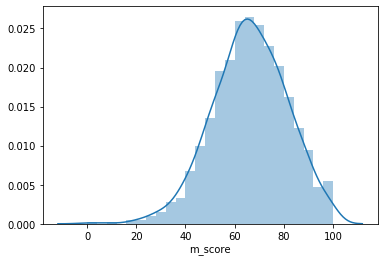

In [13]:
sns.distplot(std['m_score'],kde=True)


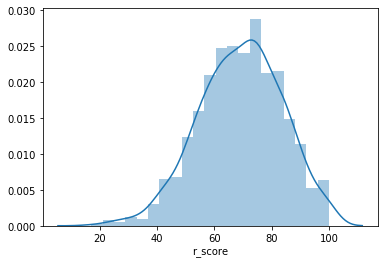

In [14]:
sns.distplot(std['r_score'],kde=True)


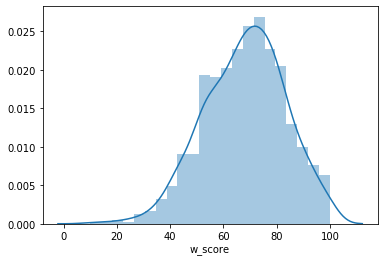

In [15]:
sns.distplot(std['w_score'],kde=True)

the above three density plots shows the density distribution of scores of the students in maths,reading and writing

considering gender we will see how students performed in scoring:-

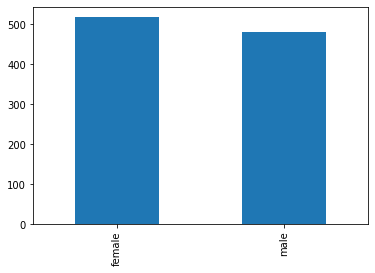

In [16]:
std.gender.value_counts().plot(kind='bar')

In [17]:
std.groupby('gender').describe()['m_score']

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


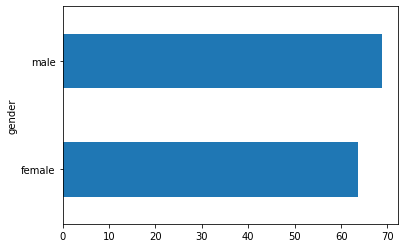

In [18]:
std.groupby('gender').m_score.mean().plot(kind='barh')


male students performed well in maths as compared to females

In [19]:
std.groupby('gender').describe()['r_score']

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.608108,14.378245,17.0,63.25,73.0,83.0,100.0
male,482.0,65.473029,13.931832,23.0,56.00,66.0,75.0,100.0


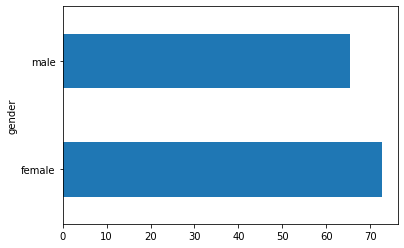

In [20]:
std.groupby('gender').r_score.mean().plot(kind='barh')

female students performed well in reading

In [21]:
std.groupby('gender').describe()['w_score']

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.467181,14.844842,10.0,64.0,74.0,82.00,100.0
male,482.0,63.311203,14.113832,15.0,53.0,64.0,73.75,100.0


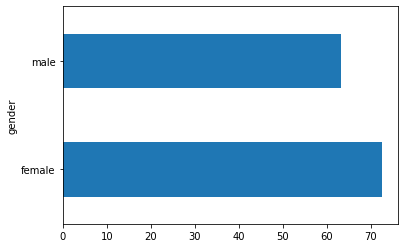

In [22]:
std.groupby('gender').w_score.mean().plot(kind='barh')

female students performed well in writing

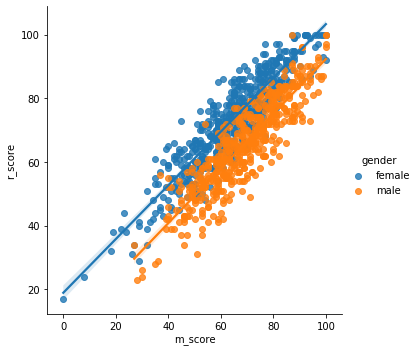

In [23]:
sns.lmplot('m_score','r_score',data=std,hue='gender')

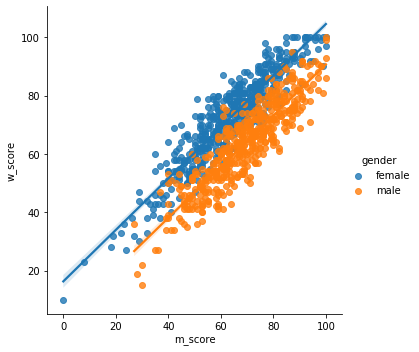

In [24]:
sns.lmplot('m_score','w_score',data=std,hue='gender')

The two scatter plots above justifies that male are better in maths while females in reading and writing

considering parental educaation:-

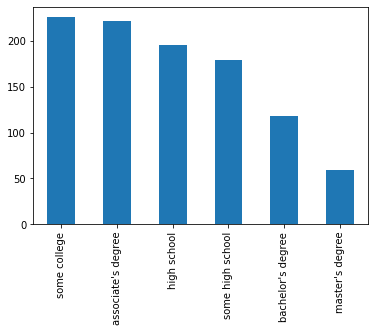

In [25]:
std.p_ed.value_counts().plot(kind='bar')

In [26]:
std.groupby('p_ed').describe()['m_score']

,count,mean,std,min,25%,50%,75%,max
p_ed,,,,,,,,
associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


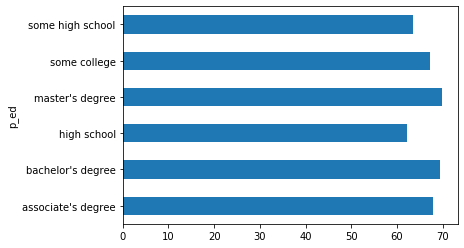

In [27]:
std.groupby('p_ed').m_score.mean().plot(kind='barh')

In [28]:
std.groupby('p_ed').describe()['r_score']

,count,mean,std,min,25%,50%,75%,max
p_ed,,,,,,,,
associate's degree,222.0,70.927928,13.868948,31.0,61.0,72.5,81.00,100.0
bachelor's degree,118.0,73.000000,14.285250,41.0,63.0,73.0,82.75,100.0
high school,196.0,64.704082,14.132130,24.0,54.0,66.0,74.25,99.0
master's degree,59.0,75.372881,13.775163,42.0,65.5,76.0,84.50,100.0
some college,226.0,69.460177,14.057049,23.0,60.0,70.5,79.75,100.0
some high school,179.0,66.938547,15.479295,17.0,56.5,67.0,79.00,100.0


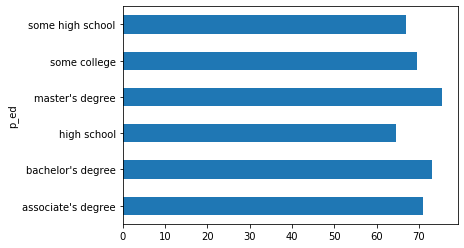

In [29]:
std.groupby('p_ed').r_score.mean().plot(kind='barh')

In [30]:
std.groupby('p_ed').describe()['w_score']

,count,mean,std,min,25%,50%,75%,max
p_ed,,,,,,,,
associate's degree,222.0,69.896396,14.311122,35.0,58.0,70.5,80.0,100.0
bachelor's degree,118.0,73.381356,14.728262,38.0,62.5,74.0,83.0,100.0
high school,196.0,62.448980,14.085907,15.0,52.0,64.0,73.0,100.0
master's degree,59.0,75.677966,13.730711,46.0,67.0,75.0,85.0,100.0
some college,226.0,68.840708,15.012331,19.0,60.0,70.0,79.0,99.0
some high school,179.0,64.888268,15.736197,10.0,54.0,66.0,77.0,100.0


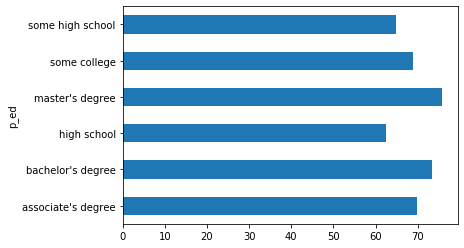

In [31]:
std.groupby('p_ed').w_score.mean().plot(kind='barh')

students with parental education as master's degree performed well in all of the three maths,reading and writing

considering the test preparation of the students:-

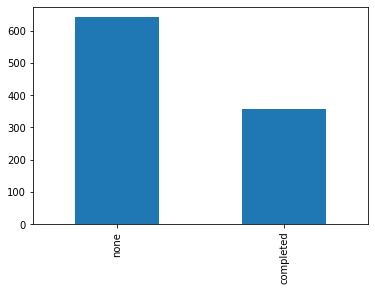

In [32]:
std.t_p.value_counts().plot(kind='bar')

In [33]:
std.groupby('t_p').describe()['m_score']

,count,mean,std,min,25%,50%,75%,max
t_p,,,,,,,,
completed,358.0,69.695531,14.444699,23.0,60.0,69.0,79.00,100.0
none,642.0,64.077882,15.192376,0.0,54.0,64.0,74.75,100.0


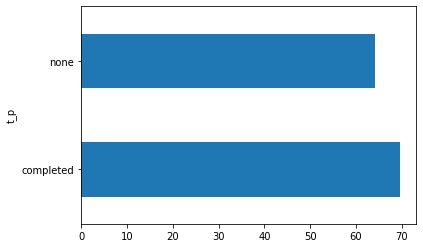

In [34]:
std.groupby('t_p').m_score.mean().plot(kind='barh')

In [35]:
std.groupby('t_p').describe()['r_score']

,count,mean,std,min,25%,50%,75%,max
t_p,,,,,,,,
completed,358.0,73.893855,13.638384,37.0,65.0,75.0,84.0,100.0
none,642.0,66.534268,14.463885,17.0,57.0,67.0,76.0,100.0


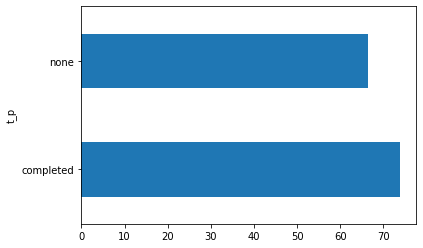

In [36]:
std.groupby('t_p').r_score.mean().plot(kind='barh')

In [37]:
std.groupby('t_p').describe()['w_score']

,count,mean,std,min,25%,50%,75%,max
t_p,,,,,,,,
completed,358.0,74.418994,13.375335,36.0,66.0,76.0,83.0,100.0
none,642.0,64.504673,14.999661,10.0,54.0,65.0,74.0,100.0


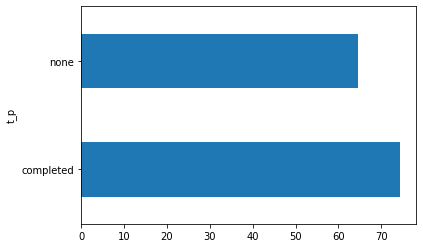

In [38]:
std.groupby('t_p').w_score.mean().plot(kind='barh')

students with test preparations performed well in all the three which is obvious

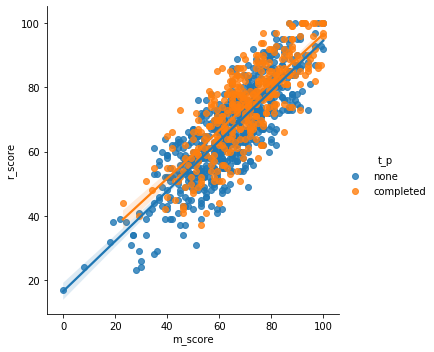

In [39]:
sns.lmplot('m_score','r_score',data=std,hue='t_p')

The above plot shows that students who completed there test preparations did better in reading as compared to math

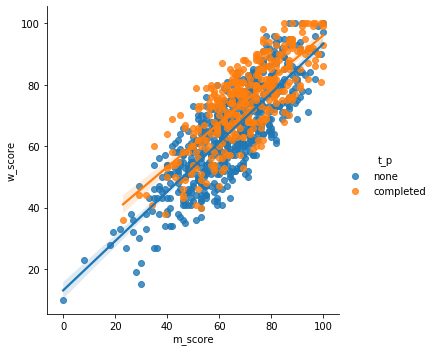

In [40]:
sns.lmplot('m_score','w_score',data=std,hue='t_p')

The above plot shows that students who completed there test preparations did better in writing as well compared to math

considering the race/ethnicity of the students:-

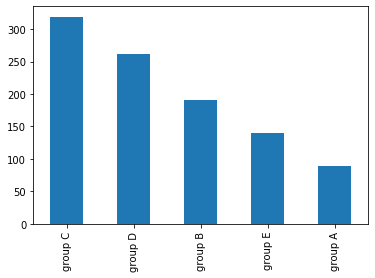

In [41]:
std.race.value_counts().plot(kind='bar')

In [42]:
std.groupby('race').describe()['m_score']

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
group A,89.0,61.629213,14.523008,28.0,51.00,61.0,71.0,100.0
group B,190.0,63.452632,15.468191,8.0,54.00,63.0,74.0,97.0
group C,319.0,64.463950,14.852666,0.0,55.00,65.0,74.0,98.0
group D,262.0,67.362595,13.769386,26.0,59.00,69.0,77.0,100.0
group E,140.0,73.821429,15.534259,30.0,64.75,74.5,85.0,100.0


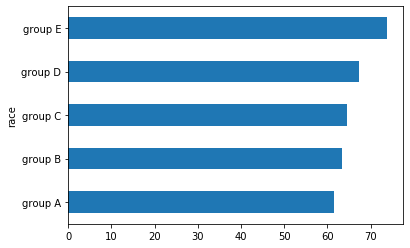

In [43]:
std.groupby('race').m_score.mean().plot(kind='barh')

In [44]:
std.groupby('race').describe()['r_score']

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
group A,89.0,64.674157,15.543762,23.0,53.00,64.0,74.00,100.0
group B,190.0,67.352632,15.177499,24.0,56.00,67.0,79.75,97.0
group C,319.0,69.103448,13.997033,17.0,60.00,71.0,78.50,100.0
group D,262.0,70.030534,13.895306,31.0,60.25,71.0,79.00,100.0
group E,140.0,73.028571,14.874024,26.0,63.00,74.0,84.00,100.0


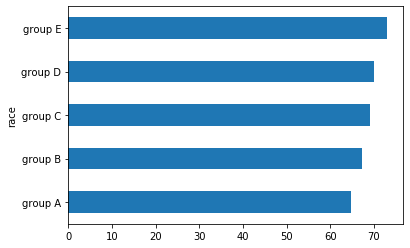

In [45]:
std.groupby('race').r_score.mean().plot(kind='barh')

In [46]:
std.groupby('race').describe()['w_score']

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
group A,89.0,62.674157,15.468278,19.0,51.00,62.0,73.00,97.0
group B,190.0,65.600000,15.625173,15.0,55.25,67.0,78.00,96.0
group C,319.0,67.827586,14.983378,10.0,57.00,68.0,79.00,100.0
group D,262.0,70.145038,14.367707,32.0,61.00,72.0,80.00,100.0
group E,140.0,71.407143,15.113906,22.0,62.00,72.0,80.25,100.0


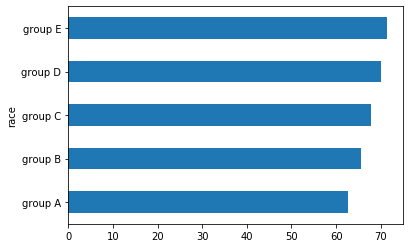

In [47]:
std.groupby('race').w_score.mean().plot(kind='barh')

The above analysis shows that students of group E performed well in all of the three 

considering the lunch of the students:-

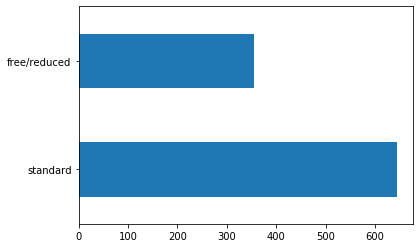

In [48]:
std.lunch.value_counts().plot(kind='barh')

In [49]:
std.groupby('lunch').describe()['m_score']

,count,mean,std,min,25%,50%,75%,max
lunch,,,,,,,,
free/reduced,355.0,58.921127,15.159956,0.0,49.0,60.0,69.0,100.0
standard,645.0,70.034109,13.653501,19.0,61.0,69.0,80.0,100.0


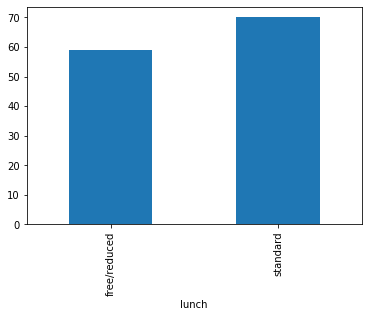

In [50]:
std.groupby('lunch').m_score.mean().plot(kind='bar')

In [51]:
std.groupby('lunch').describe()['r_score']

,count,mean,std,min,25%,50%,75%,max
lunch,,,,,,,,
free/reduced,355.0,64.653521,14.895339,17.0,56.0,65.0,75.0,100.0
standard,645.0,71.654264,13.830602,26.0,63.0,72.0,82.0,100.0


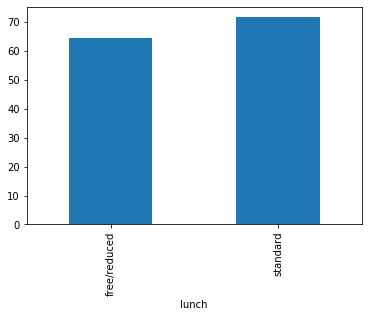

In [52]:
std.groupby('lunch').r_score.mean().plot(kind='bar')

In [53]:
std.groupby('lunch').describe()['w_score']

,count,mean,std,min,25%,50%,75%,max
lunch,,,,,,,,
free/reduced,355.0,63.022535,15.433823,10.0,53.0,64.0,74.0,100.0
standard,645.0,70.823256,14.339487,22.0,62.0,72.0,81.0,100.0


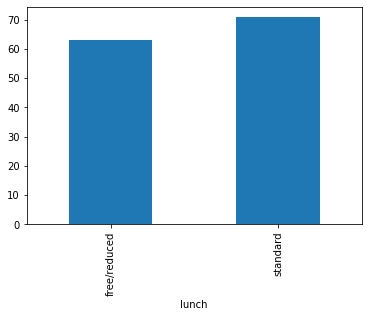

In [54]:
std.groupby('lunch').w_score.mean().plot(kind='bar')

Students having standard lunch did better than those with free/reduced lunch